In [4]:
library(igraph)



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



ERROR: Error in UseMethod("open"): no applicable method for 'open' applied to an object of class "character"


In [11]:
g<-read.graph("/Users/yangyang/Documents/GitHub/232E/Project4/edge_list.txt",format="ncol",directed = TRUE)
rateLines <- readLines("/Users/yangyang/Downloads/movieid.txt")

Warning message in readLines("/Users/yangyang/Downloads/movieid.txt"):
“incomplete final line found on '/Users/yangyang/Downloads/movieid.txt'”

In [4]:
addRate = rep("null",vcount(g))
for (i in 1:length(rateLines)){
    rateInfo <- strsplit(rateLines[i],"\t")
    movie_id <- rateInfo[[1]][1]
    #print (id)
    node_idx <- which(V(g)$name == movie_id)
    #print (node_idx)
    addRate[node_idx] <- rateInfo[[1]][4]
}
V(g)$rate = addRate
print(vcount(g))

print(which(V(g)$name == 10321))
print(which(V(g)$name == 39182))
print(which(V(g)$name == 78995))

[1] 203572
[1] 12307
[1] 4979
[1] 12659


In [6]:
#batman v superman
g_1 = induced_subgraph(g, c(12307, neighbors(g,12307)))
rate_1 = c()
for (i in V(g_1)$rate){
    if(i=='NA'){
        
    }else{
      rate_1 <- c(rate_1, as.numeric(i))  
    }    
}

print (mean(rate_1))
write.csv(rate_1, file = "rate_1_.csv", row.names=FALSE)

[1] 6.326737


In [7]:
#mision impossible
g_2 = induced_subgraph(g, c(4979, neighbors(g,4979)))
rate_2 = c()
for (i in V(g_2)$rate){
    if(i=='NA'){
        
    }else{
      rate_2 <- c(rate_2, as.numeric(i))  
    }    
}
print (mean(rate_2))
write.csv(rate_2, file = "rate_2_.csv", row.names=FALSE)


[1] 6.234195


In [8]:
#minions
g_3 = induced_subgraph(g, c(12659, neighbors(g,12659)))
rate_3 = c()
for (i in V(g_3)$rate){
    if(i=='NA'){
        
    }else{
      rate_3 <- c(rate_3, as.numeric(i))  
    }    
}
print (mean(rate_3))
write.csv(rate_3, file = "rate_3_.csv", row.names=FALSE)

[1] 6.82966


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

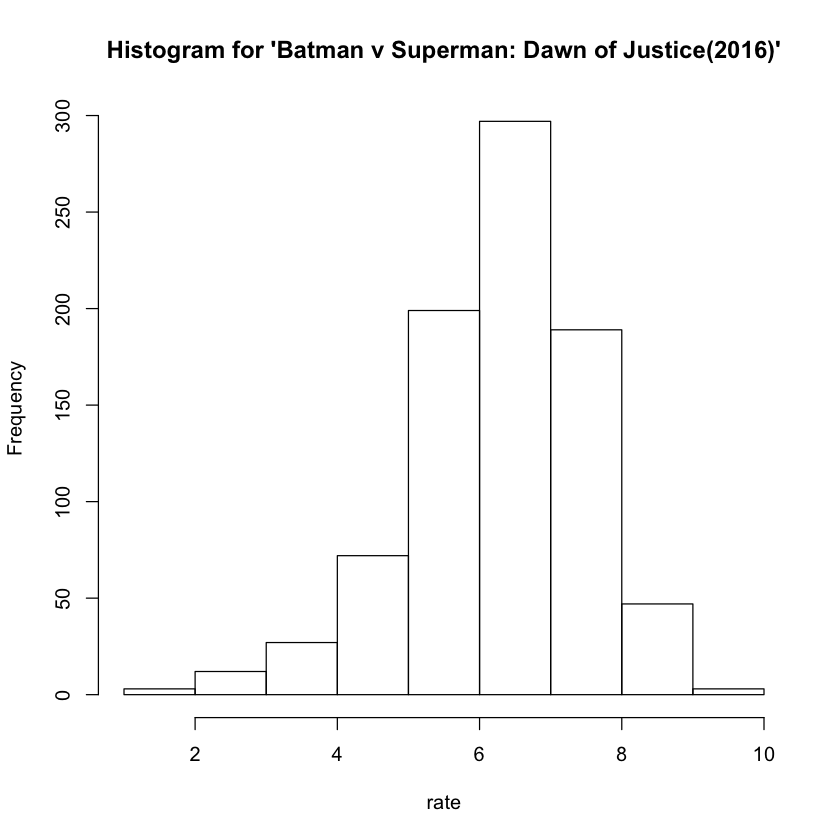

In [9]:
#graph batman
readlines <- readLines("/Users/yangyang/rate_1_.csv")
rate <- as.numeric(readlines)
hist(rate, main="Histogram for 'Batman v Superman: Dawn of Justice(2016)'")

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

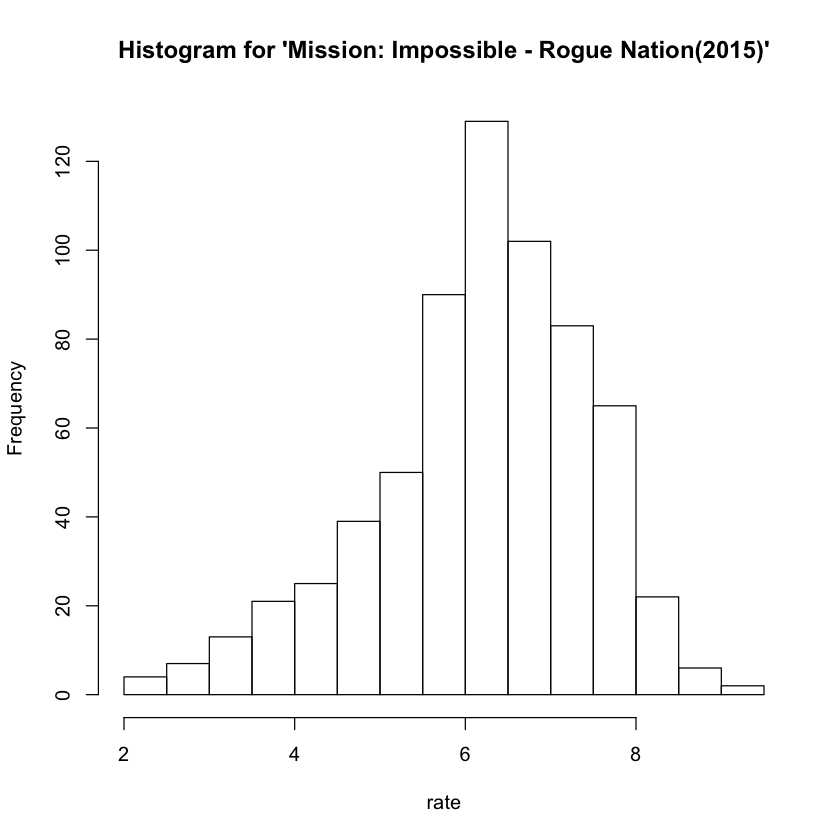

In [10]:
#graph mission
readlines <- readLines("rate_2_.csv")
rate <- as.numeric(readlines)
hist(rate, main="Histogram for 'Mission: Impossible - Rogue Nation(2015)'")

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

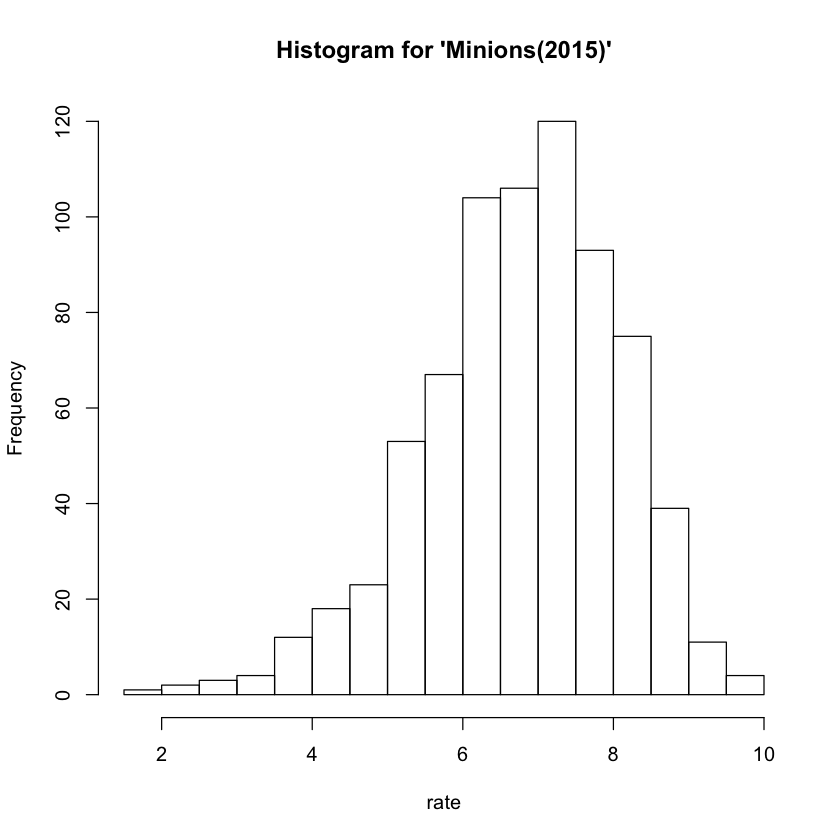

In [11]:
#graph minions
readlines <- readLines("rate_3_.csv")
rate <- as.numeric(readlines)
hist(rate, main="Histogram for 'Minions(2015)'")

In [21]:
#question 10
g<-read.graph("/Users/yangyang/Documents/GitHub/232E/Project4/edge_list.txt",format="ncol")
rateLines <- readLines("/Users/yangyang/Downloads/movieid.txt")

Warning message in readLines("/Users/yangyang/Downloads/movieid.txt"):
“incomplete final line found on '/Users/yangyang/Downloads/movieid.txt'”

In [22]:
addRate = rep("null",vcount(g))
for (i in 1:length(rateLines)){
    rateInfo <- strsplit(rateLines[i],"\t")
    movie_id <- rateInfo[[1]][1]
    #print (id)
    node_idx <- which(V(g)$name == movie_id)
    #print (node_idx)
    addRate[node_idx] <- rateInfo[[1]][4]
}
V(g)$rate = addRate
print(vcount(g))

communities <- fastgreedy.community(g)

[1] 203572


In [23]:
find_same_coms = function(g, cmmunities, movies, ids) {
    same_coms = list()
    for(i in 1:length(sizes(communities))) { 
        movies_same_com = (1:vcount(g))[communities$membership == i]
        for (j in 1:length(movies)) {
            vids = V(g)[movies_same_com]
            id = ids[j]
            if ( id %in% vids) {
                sub_g = induced_subgraph(g, vids)
                same_coms[[j]] = sub_g
            }
        }
    }
    return (same_coms)
}

In [24]:
movies = c(10321,39182,78995)
ids = c(12307,4979,12659)
coms = find_same_coms(g, communities, movies, ids)
for(i in 1:length(coms)) {
    com = coms[[i]]
    new_id = which(V(com)$name == movies[i])
    print(new_id)
}

[1] 10665
[1] 4063
[1] 10980


In [25]:
#batman v superman
g_1_ = induced_subgraph(coms[[1]], c(10665, neighbors(coms[[1]],10665)))
rate = c()
for (i in V(g_1_)$rate){
    if(i=='NA'){
        
    }else{
      rate <- c(rate, as.numeric(i))  
    }    
}
print (mean(rate))
write.csv(rate, file = "Rate_1.csv", row.names=FALSE)

[1] 6.32075


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

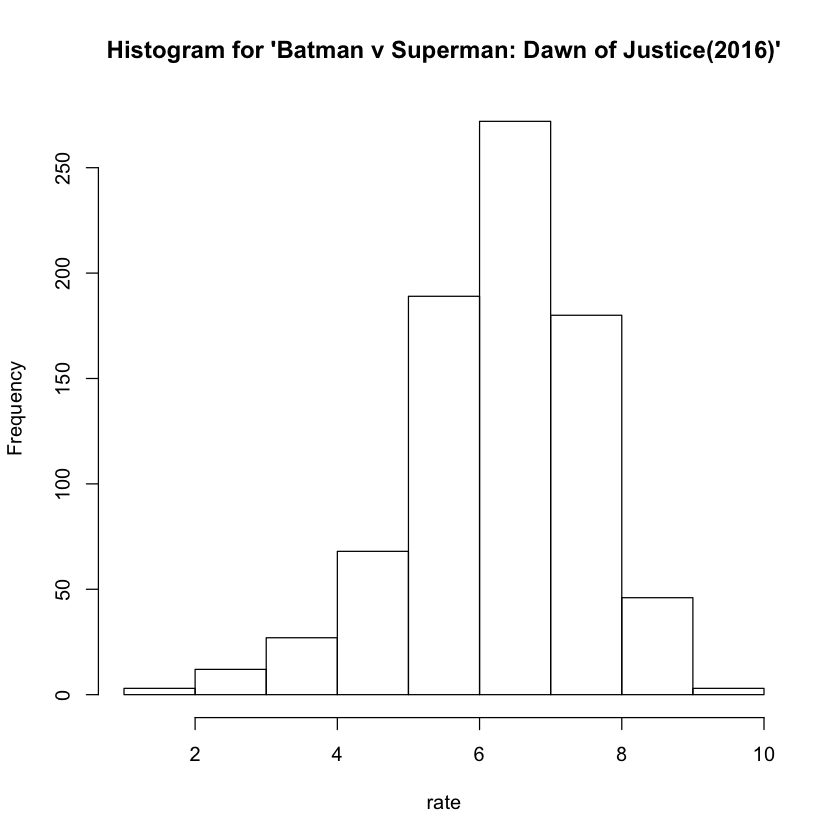

In [31]:
readlines <- readLines("/Users/yangyang/Rate_1.csv")
rate <- as.numeric(readlines)
hist(rate, main="Histogram for 'Batman v Superman: Dawn of Justice(2016)'")

[1] 6.267504


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

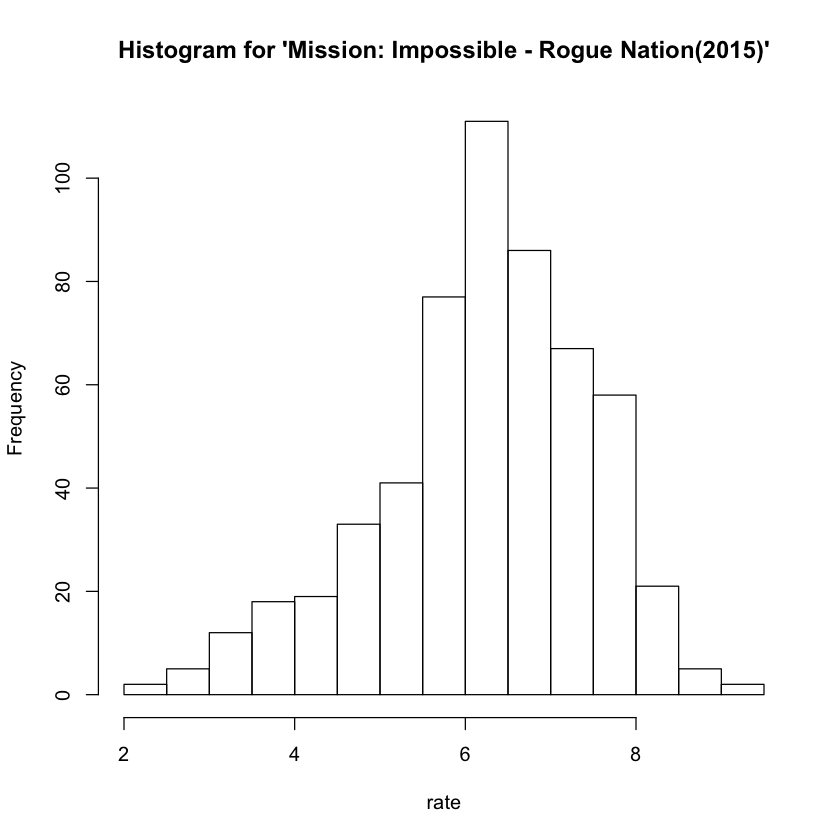

In [28]:
#mission
g_2_ = induced_subgraph(coms[[2]], c(4063, neighbors(coms[[2]],4063)))
rate = c()
for (i in V(g_2_)$rate){
    if(i=='NA'){
        
    }else{
      rate <- c(rate, as.numeric(i))  
    }    
}
print (mean(rate))
write.csv(rate, file = "Rate_2.csv", row.names=FALSE)

readlines <- readLines("Rate_2.csv")
rate <- as.numeric(readlines)
hist(rate, main="Histogram for 'Mission: Impossible - Rogue Nation(2015)'")

[1] 6.846515


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

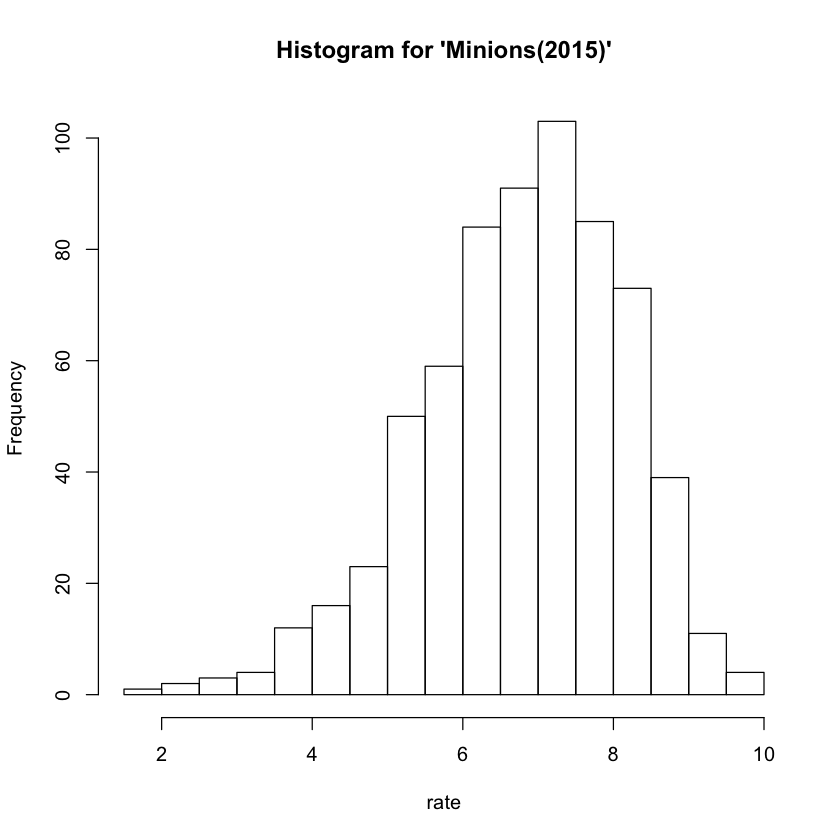

In [29]:
#minions
g_3_ = induced_subgraph(coms[[3]], c(10980, neighbors(coms[[3]],10980)))
rate = c()
for (i in V(g_3_)$rate){
    if(i=='NA'){
        
    }else{
      rate <- c(rate, as.numeric(i))  
    }    
}
print (mean(rate))
write.csv(rate, file = "Rate_3.csv", row.names=FALSE)

readlines <- readLines("Rate_3.csv")
rate <- as.numeric(readlines)
hist(rate, main="Histogram for 'Minions(2015)'")

In [32]:
# Q11
find_ids = function(g, movies) {
    ids = list()
    for (i in movies) {
        id = which(V(g)$name == i)
        ids = rbind(ids, id)
    } 
    return (ids)
}
find_membership = function(g, communities, movies) {
    ids = find_ids(g, movies)
    membership = list()
    for(i in 1:length(sizes(communities))) { 
        movies_same_com = (1:vcount(g))[communities$membership == i]
        for (j in 1:length(movies)) {
            vids = V(g)[movies_same_com]
            id = ids[j]
            if ( id %in% vids) {
                membership[[j]] = i
            }
        }
    }
    return (membership)
}
e1 <- E(g)[from(12307)]
e1_top_weights <- order(e1$weight, decreasing=TRUE)[1:5]
E(g)[ as.vector(e1)[e1_top_weights] ]

+ 5/66518974 edges from 74d6d9b (vertex names):
[1] 22165--10321 10321--10363 33301--10321 10321--9502  3384 --10321

In [33]:
movies1 = c(22165,10363,33301,9502,3384)
membership1 = find_membership(g,communities,movies1)
membership1


[[1]]
[1] 1

[[2]]
[1] 1

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 1

In [ ]:
#Eloise (2015)
#The Justice League Part One (2017)
#Into the Storm (2014)
#Love and Honor (2013)
#Man of Steel (2013)

In [34]:
e2 <- E(g)[from(4979)]
e2_top_weights <- order(e2$weight, decreasing=TRUE)[1:5]
E(g)[ as.vector(e2)[e2_top_weights] ]

+ 5/66518974 edges from 74d6d9b (vertex names):
[1] 39182--32741 39182--32744 39182--57762 39182--68813 39182--39183

In [35]:
movies2 = c(32741,32744,57762,68813,39183)
membership2 = find_membership(g,communities,movies2)
membership2

[[1]]
[1] 5

[[2]]
[1] 5

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 1

In [ ]:
#32741	Fan (2015)
#32744	Phantom (2015)
#57762	Breaking the Bank (2014)
#68813	Suffragette (2015)
#39183	Now You See Me: The Second Act (2016)

In [36]:
e3 <- E(g)[from(12659)]
e3_top_weights <- order(e3$weight, decreasing=TRUE)[1:5]
E(g)[ as.vector(e3)[e3_top_weights] ]

+ 5/66518974 edges from 74d6d9b (vertex names):
[1] 37617--78995 78995--16741 37589--78995 78995--52491 78995--61332

In [ ]:
#37617	The Lorax (2012)
#16741	Inside Out (2015)
#37589	Despicable Me 2 (2013)
#52491	Up (2009)
#61332	Surf's Up (2007)

In [37]:
movies3 = c(37617,16741,37589,52491,61332)
membership3 = find_membership(g,communities,movies3)
membership3

[[1]]
[1] 1

[[2]]
[1] 1

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 1

# Problem 4 & 5

In [20]:
g1<-read.graph('/Users/yangyang/Downloads/network.txt', format="ncol", directed=TRUE)

In [31]:
page_rank_res = page.rank(g1, directed = TRUE, damping = 0.85, weights = NULL)



In [32]:
page_rank_res_sorted = sort(page_rank_res$vector,decreasing=TRUE, index.return = TRUE)


In [33]:
for(i in 1:10)
{  
    print(page_rank_res_sorted[i])
}

$x
       85734        65947        27643         6539        45415        32130 
2.351278e-04 1.989547e-04 1.971991e-04 1.954943e-04 1.727122e-04 1.585656e-04 
       52784        40351        18112        49651        20551        59734 
1.573124e-04 1.567347e-04 1.517775e-04 1.469482e-04 1.463924e-04 1.454383e-04 
       63886        34263        49295        64820        66694        29606 
1.386548e-04 1.369752e-04 1.364608e-04 1.352397e-04 1.340467e-04 1.310968e-04 
       37263        49605        47109         7581        69910        13293 
1.309862e-04 1.297172e-04 1.258567e-04 1.255616e-04 1.248814e-04 1.246151e-04 
       27101        34445        49621        41373        64422         3249 
1.242636e-04 1.241058e-04 1.240649e-04 1.219351e-04 1.203297e-04 1.198839e-04 
       21532        26696        64067        56560        76492        17967 
1.192638e-04 1.186847e-04 1.157016e-04 1.152129e-04 1.141920e-04 1.121969e-04 
        6559        37213         8214        568

ERROR: Error in parse(text = x, srcfile = src): <text>:1:25: unexpected '['
1: pagerank_top10_act_id = [
                            ^


In [27]:
degree(g1,"85734",mode="in")
degree(g1,"65947",mode="in")
degree(g1,"27643",mode="in")
degree(g1,"6539",mode="in")
degree(g1,"45415",mode="in")
degree(g1,"32130",mode="in")
degree(g1,"52784",mode="in")
degree(g1,"40351",mode="in")
degree(g1,"18112",mode="in")
degree(g1,"49651",mode="in")

85734 
 7537

65947 
 3954

27643 
 6960

6539 
3316

45415 
 6587

32130 
 2905

52784 
 5563

40351 
 2662

18112 
 2953

49651 
 5502

In [36]:
degree(g1,12812,mode="in")
degree(g1,14503,mode="in")
degree(g1,"16878",mode="in")
degree(g1,"17285",mode="in")
degree(g1,"27258",mode="in")
degree(g1,"32389",mode="in")

e="in")
degree(g1,"17285",mode="in
degree(g1,12812,mode
degree(g1,"53248",mode="in")
degree(g1,"62774",mode="in")
degree(g1,"107832",mode="in")
degree(g1,"111298",mode="in")

39149 
  832

68476 
  254

16878 
 2144

17285 
 1301

27258 
 2064

32389 
 1357

53248 
 1739

62774 
 1319

107832 
  1594

111298 
   453